In [1]:
### Combine and Process and Beautify Mesa Data
### Prof. Kay (Jennifer.E.Kay@colorado.edu)
### last updated: Feb. 25, 2022

### TO DO: Deal with missing data, but also can do this in the assignment.

In [2]:
#import modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import numpy.linalg as LA
from matplotlib.gridspec import GridSpec
import timeit
import datetime
import scipy.stats as stats
import glob
from datetime import date
import datetime

In [3]:
### read in the data

df2016 = pd.read_csv("mesalab_2016_data.csv")
df2016['year']=2016

df2017 = pd.read_csv("mesalab_2017_data.csv")
df2017['year']=2017

df2018 = pd.read_csv("mesalab_2018_data.csv")
df2018['year']=2018

df2019 = pd.read_csv("mesalab_2019_data.csv")
df2019['year']=2019

df2020 = pd.read_csv("mesalab_2020_data.csv")
df2020['year']=2020

df2021 = pd.read_csv("mesalab_2021_data.csv")
df2021['year']=2021

In [4]:
### concatenate the data using pandas (pd.concat), check the dimensions

df=pd.concat([df2016, df2017, df2018, df2019, df2020, df2021])
print(df)
print(df.shape)
nyrs=6
print(f'check the dimensions - should be 105120*nyrs: {105120*nyrs}')

         days  hour_frac        pres  tdry         rh   wdir  wspd  wspdmax  \
0         1.0   0.000000  817.400024  -7.7  72.099998  316.0   2.2      3.0   
1         1.0   0.083333  817.400024  -7.7  72.699997  320.0   2.1      2.7   
2         1.0   0.166667  817.400024  -7.8  73.199997  316.0   2.0      2.6   
3         1.0   0.250000  817.500000  -7.9  73.699997  309.0   1.7      2.3   
4         1.0   0.333333  817.500000  -7.9  74.000000  305.0   1.6      2.2   
...       ...        ...         ...   ...        ...    ...   ...      ...   
105115  365.0  23.583333  794.900024  -4.4  86.500000  100.0   1.8      4.8   
105116  365.0  23.666667  795.000000  -4.4  86.500000   87.0   2.0      5.2   
105117  365.0  23.750000  795.099976  -4.5  86.599998  100.0   1.6      4.6   
105118  365.0  23.833333  795.099976  -4.4  86.699997   84.0   2.4      4.5   
105119  365.0  23.916667  795.099976  -4.5  86.699997   74.0   2.0      4.2   

        raina_event  year  
0               0.0  20

In [5]:
#### RENAME THE COLUMNS to include units and be more specific
df=df.rename(columns={"days": "day", "hour_frac": "hour_UTC", "pres": "pres_mb", 
                  "tdry": "tdry_degC","rh": "rh_percent","wdir": "wdir",
                  "wspd": "wspd_m_per_s", "wspdmax":"wspdmax_m_per_s",
                  "raina_event":"raina_event_mm","year": "year"})
print(df)

          day   hour_UTC     pres_mb  tdry_degC  rh_percent   wdir  \
0         1.0   0.000000  817.400024       -7.7   72.099998  316.0   
1         1.0   0.083333  817.400024       -7.7   72.699997  320.0   
2         1.0   0.166667  817.400024       -7.8   73.199997  316.0   
3         1.0   0.250000  817.500000       -7.9   73.699997  309.0   
4         1.0   0.333333  817.500000       -7.9   74.000000  305.0   
...       ...        ...         ...        ...         ...    ...   
105115  365.0  23.583333  794.900024       -4.4   86.500000  100.0   
105116  365.0  23.666667  795.000000       -4.4   86.500000   87.0   
105117  365.0  23.750000  795.099976       -4.5   86.599998  100.0   
105118  365.0  23.833333  795.099976       -4.4   86.699997   84.0   
105119  365.0  23.916667  795.099976       -4.5   86.699997   74.0   

        wspd_m_per_s  wspdmax_m_per_s  raina_event_mm  year  
0                2.2              3.0             0.0  2016  
1                2.1              2

In [6]:
#### CONVERT the day column to a datetime day

fooyear=df['day'][0:365*288].astype(int)
#print(len(fooyear))

### 2016 (leap year)
#print(fooyear[0])
foo=[datetime.date.fromordinal(day+735963) for day in fooyear[0:(31+28)*288]]
#print(foo[0])
#print(foo[-1:])
foo1=[datetime.date.fromordinal(day+735963+1) for day in fooyear[59*288:365*288]]
#print(foo1[0])
#print(foo1[-1:])
foo2016=np.append(foo,foo1)
#print(foo2016.shape)

### 2017
#print(fooyear[0])
foo2017=[datetime.date.fromordinal(day+735963+1+365) for day in fooyear] 
#print(len(foo2017))
#print(foo2017[0])
#print(foo2017[-1:])

### 2018
foo2018=[datetime.date.fromordinal(day+735963+1+365*2) for day in fooyear]
#print(foo2018[0])
#print(foo2018[-1:])
#print(len(foo2018))

### 2019
foo2019=[datetime.date.fromordinal(day+735963+1+365*3) for day in fooyear]
#print(foo2019[0])
#print(foo2019[-1:])
#print(len(foo2019))

### 2020 (leap year)
#print(fooyear[0])
foo=[datetime.date.fromordinal(day+735963+1+365*4) for day in fooyear[0:(31+28)*288]]
#print(foo[0])
#print(foo[-1:])
foo1=[datetime.date.fromordinal(day+735963+2+365*4) for day in fooyear[59*288:365*288]]
#print(foo1[0])
#print(foo1[-1:])
foo2020=np.append(foo,foo1)
#print(foo2020.shape)

### 2021
foo2021=[datetime.date.fromordinal(day+735963+2+365*5) for day in fooyear]
print(foo2021[0])
print(foo2021[-1:])
print(len(foo2021))

foo1=np.append(foo2016,foo2017)
foo2=np.append(foo2018,foo2019)
foo3=np.append(foo2020,foo2021)
days_datetime=np.append(np.append(foo1,foo2),foo3)
print(days_datetime.shape[0])

print(df['day'].shape[0])

df['day']=days_datetime
df

2021-01-01
[datetime.date(2021, 12, 31)]
105120
630720
630720


,day,hour_UTC,pres_mb,tdry_degC,rh_percent,wdir,wspd_m_per_s,wspdmax_m_per_s,raina_event_mm,year
0,2016-01-01,0.000000,817.400024,-7.7,72.099998,316.0,2.2,3.0,0.0,2016
1,2016-01-01,0.083333,817.400024,-7.7,72.699997,320.0,2.1,2.7,0.0,2016
2,2016-01-01,0.166667,817.400024,-7.8,73.199997,316.0,2.0,2.6,0.0,2016
3,2016-01-01,0.250000,817.500000,-7.9,73.699997,309.0,1.7,2.3,0.0,2016
4,2016-01-01,0.333333,817.500000,-7.9,74.000000,305.0,1.6,2.2,0.0,2016
...,...,...,...,...,...,...,...,...,...,...
105115,2021-12-31,23.583333,794.900024,-4.4,86.500000,100.0,1.8,4.8,0.0,2021
105116,2021-12-31,23.666667,795.000000,-4.4,86.500000,87.0,2.0,5.2,0.0,2021
105117,2021-12-31,23.750000,795.099976,-4.5,86.599998,100.0,1.6,4.6,0.0,2021
105118,2021-12-31,23.833333,795.099976,-4.4,86.699997,84.0,2.4,4.5,0.0,2021


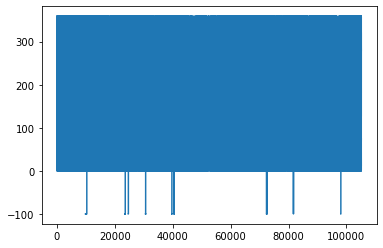

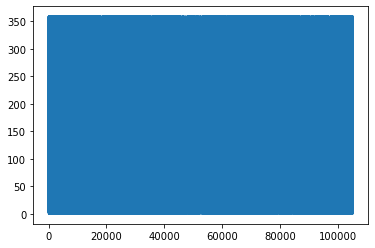

In [7]:
### quality control for wind dir to remove values below 0
data=df['wdir']
plt.plot(data)
plt.show()
data1=np.where(data<0,np.nan,data);
df['wdir']=data1
plt.plot(df['wdir'])

In [8]:
## save to a csv file

df.to_csv('mesalab_data_2016-2021_withmissing.csv', index=False)

In [9]:
## save hourly to a csv file

ds_every2hours=df.iloc[::24, :].shape

df2 = df[df.index % 12 == 0]  # Selects every 12th row starting from 0

print(f'number of evenly spaced values in a day: {df2.shape[0]/nyrs/365}')
df2

df2.to_csv('mesalab_data_2016-2021_withmissing_hourly.csv', index=False)

number of evenly spaced values in a day: 24.0


In [10]:
#### deal with missing values... ### TO DO

### recipe is going to be:
### if the gap is less than an hour, linearly interpolate
### if the gap is greater than an hour -- options
### 1) use data from the last day where an obs available at that time
### 2) use data from a different year at the same time/day
### 3) replace the value with the mean over all years.  the mean here would be the monthly mean.